In [1]:
# Practical 8: Implement MLP for classification of handwritten digits (MNIST #Dataset)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from keras.utils import np_utils 
from keras.datasets import mnist 

In [3]:
#function for updating plots for each each epoch and error

def plt_dynamic (x,vy, ty, ax, colors=['b']):
    ax.plot (x, vy, 'b',label='Validation Loss')
    ax.plot(x,vy, 'r',label='Trin Loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
#train and test data
(X_train,y_train), (X_test,y_test)=mnist.load_data()

In [5]:
X_train=X_train.reshape(X_train.shape [0], X_train.shape [1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape [0],X_test.shape [1]*X_test.shape [2])

In [6]:
print('Number of Training Examples:',X_train.shape [0], 'and each image is of shape (%d)' %(X_train.shape[1]))
print('Number of Test Examples:',X_test.shape [0], 'and each image is of shape (%d)' %(X_test.shape[1]))

Number of Training Examples: 60000 and each image is of shape (784)
Number of Test Examples: 10000 and each image is of shape (784)


In [7]:
# example of data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# normalize the data 
X_train=X_train/255
X_test=X_test/255

In [9]:

print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# class number for each image
print('Class label of first image:',y_train[0])

# convert this into 10 decimal vector

Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)

print('After converting the output into a vector:',Y_train[0])

Class label of first image: 5
After converting the output into a vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
# build softmax classifier

from keras.models import Sequential 
from keras.layers import Dense, Activation


#model parameters
output_dim=10
input_dim=X_train.shape[1]

batch_size=128
nb_epoch=20

In [12]:
model=Sequential()

model.add(Dense(output_dim,input_dim=input_dim, activation='softmax'))

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [14]:
# Configure the learning process

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# train using fit()

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.2917 - accuracy: 0.6902 - val_loss: 0.8133 - val_accuracy: 0.8291
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7215 - accuracy: 0.8357 - val_loss: 0.6092 - val_accuracy: 0.8606
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5911 - accuracy: 0.8573 - val_loss: 0.5276 - val_accuracy: 0.8727
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5285 - accuracy: 0.8681 - val_loss: 0.4816 - val_accuracy: 0.8804
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4903 - accuracy: 0.8743 - val_loss: 0.4514 - val_accuracy: 0.8846
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4640 - accuracy: 0.8791 - val_loss: 0.4297 - val_accuracy: 0.8894
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4446 - accuracy: 0.8826 - val_loss: 0.4137 - val_accuracy: 0.8929
Epoch 

In [15]:
score=model.evaluate (X_test,Y_test, verbose=0) 
print('Test Score',score [0])
print('Test Accuracy',score[1])

Test Score 0.3358338177204132
Test Accuracy 0.9078999757766724


In [16]:
# multilayer perceptron
model_sigmoid=Sequential()
model_sigmoid.add(Dense(512,activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim,activation='softmax'))
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 2.2781 - accuracy: 0.2031 - val_loss: 2.2353 - val_accuracy: 0.3841
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 2.1941 - accuracy: 0.4308 - val_loss: 2.1435 - val_accuracy: 0.5903
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 2.0872 - accuracy: 0.5634 - val_loss: 2.0139 - val_accuracy: 0.6024
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 1.9326 - accuracy: 0.6144 - val_loss: 1.8278 - val_accuracy: 0.6751
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 1.7217 - accuracy: 0.6603 - val_loss: 1.5911 - val_accuracy: 0.6656
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 1.4814 - accuracy: 0.6959 - val_loss: 1.3493 - val_accuracy: 0.7207
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 1.2607 - accuracy: 0.7352 - val_loss: 1.1491 - val_accuracy: 0.7601

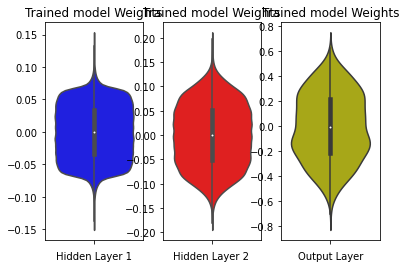

In [18]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot (1, 3, 1)
plt.title("Trained model Weights") 
ax = sns.violinplot (y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot (1, 3, 2)
plt.title("Trained model Weights") 
ax = sns.violinplot (y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot (1, 3, 3)
plt.title("Trained model Weights") 
ax = sns.violinplot (y=out_w,color='y')
plt.xlabel('Output Layer')
plt.show()